In [21]:
import SnakesLadders as SL
from pprint import PrettyPrinter
import pandas as pd
%matplotlib inline

pp = PrettyPrinter(16)  # 16 is the column width of the output

In [2]:
game = SL.GameFSM(16)

# Make ladders
game.all_states[2].link = 10
game.all_states[8].link = 14

# Make snakes
game.all_states[11].link = 4
game.all_states[15].links = 6

game.make_state_kinds()

In [3]:
game.run()
pp.pprint(game.records)
print(SL.count_moves(game.records))
print(SL.count_snakes_and_ladders(game.records))

[               {'die': 3, 'end': 3, 'kind': 'B', 'start': 0},
                {'die': 1, 'end': 4, 'kind': 'B', 'start': 3},
                {'die': 2, 'end': 6, 'kind': 'B', 'start': 4},
                {'die': 1, 'end': 7, 'kind': 'B', 'start': 6},
                {'die': 3, 'end': 10, 'kind': 'B', 'start': 7},
                {'die': 3, 'end': 13, 'kind': 'B', 'start': 10},
                {'die': 4, 'end': 16, 'kind': 'B', 'start': 13}]
7
(0, 0)


Find average number of moves in 1000 games (variable `num_runs`)

In [10]:
tot_moves = 0
all_moves = []
num_runs = 10000
for i in range(num_runs):
    game.run()
    moves = SL.count_moves(game.records)
    tot_moves += moves
    all_moves.append(moves)
print(tot_moves/num_runs)

5.6253


In [11]:
max(all_moves)

21

In [14]:
df = pd.DataFrame({'moves': all_moves})

In [16]:
df.describe()

,moves
count,10000.000000
mean,5.625300
std,2.259648
min,3.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,21.000000


In [24]:
type(df['moves'].value_counts())

pandas.core.series.Series

In [31]:
move_counts = df['moves'].value_counts()

**We want as many bins as there are integers between the lowest and highest number of moves found in the data!**
`keys` is the method of the pd.Series object that pulls out those numbers. This approach is more robust than simply taking `len(move_counts)` in case some # moves are not represented.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x08241270>]], dtype=object)

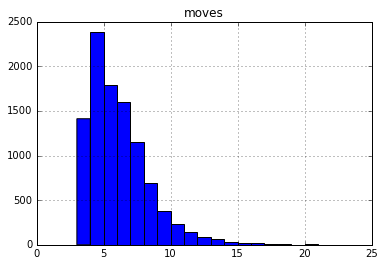

In [30]:
df.hist(bins=max(move_counts.keys())-min(move_counts.keys()))